# Fardous Sabnur

### Imports

In [29]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"


import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(8112)
tf.random.set_seed(8112)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import cv2
import seaborn as sns
import shutil
from tqdm import tqdm
import pickle
import random
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
#from tensorflow.keras import layers, Input, InputLayer, Flatten
#from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from keras.layers.core import Dense
from tensorflow.keras.layers import InputLayer

from tensorflow.keras import layers, Input
from tensorflow.keras.models import Model

from tensorflow.python.keras.applications.resnet import ResNet50
from tensorflow.python.keras.applications.resnet import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization




### Reading in directories for train, test and validation data

In [30]:
TRAIN_PATH = '/Users/fardoussabnur/Desktop/flowers/flowers/flower_photos/train'
TEST_PATH = '/Users/fardoussabnur/Desktop/flowers/flowers/flower_photos/test'
VALID_PATH = '/Users/fardoussabnur/Desktop/flowers/flowers/flower_photos/validation'



### Visualizing few of the images

Notice how they have different shapes. Some have horizontal orientations, some have landscape orientation, some are also square shaped

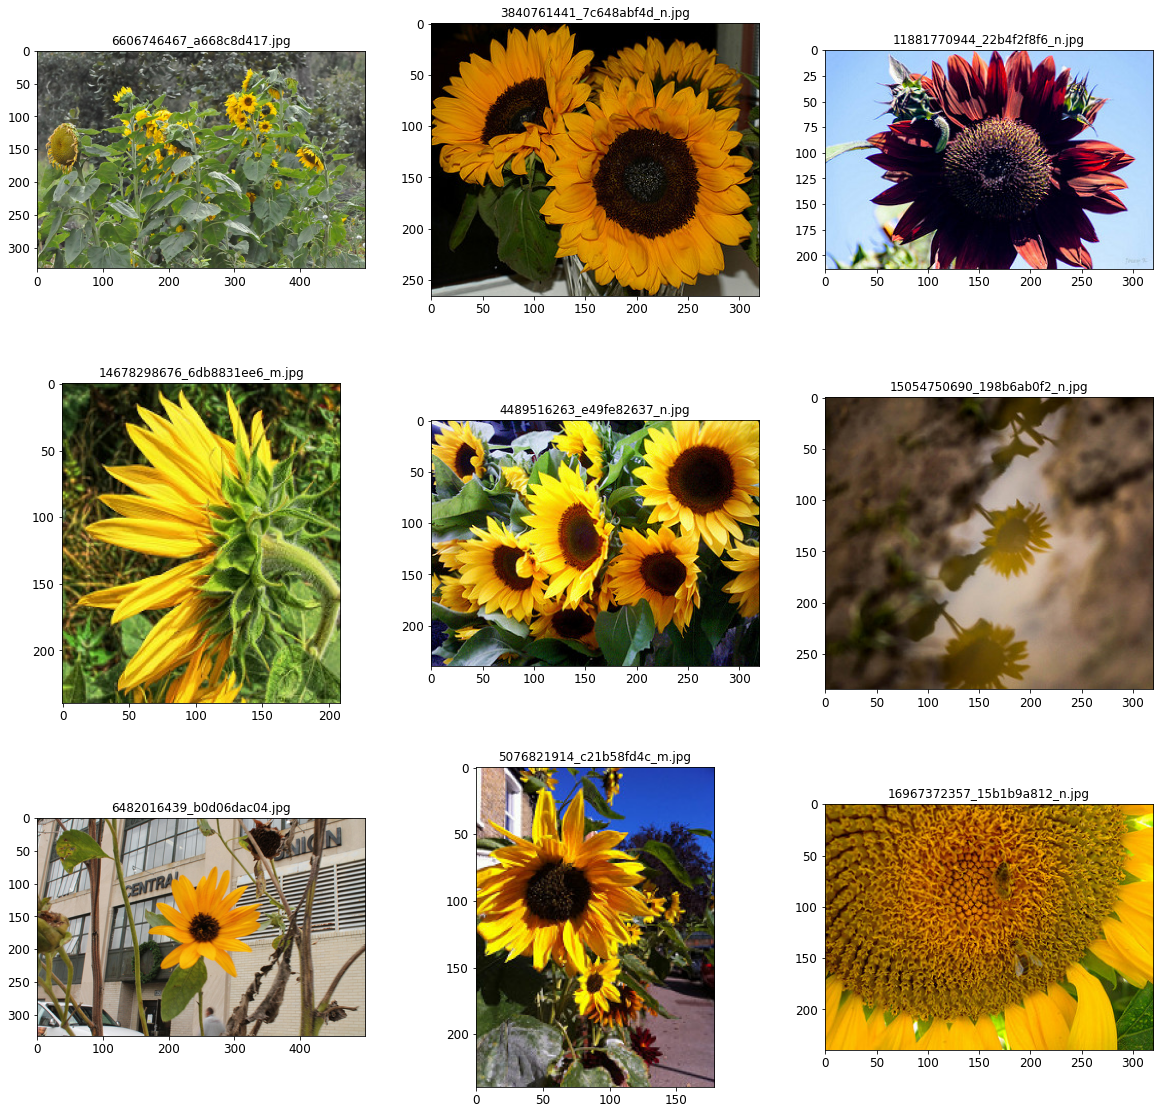

In [31]:
from IPython.display import Image
plt.figure(figsize=(20,20))
test_folder="/Users/fardoussabnur/Desktop/flowers/flowers/flower_photos/train/sunflowers"
for i in range(9):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(3,3,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

### Creating datasets from the folders

In [32]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (100, 100),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name


In [33]:
img_data, class_name = create_dataset(TRAIN_PATH)

In [34]:
valid_img_data, valid_class_name = create_dataset(VALID_PATH)

In [35]:
TEST_img_data, TEST_class_name = create_dataset(TEST_PATH)

In [36]:
dataset_size1 = len(img_data)
dataset_size2 = len(valid_img_data)
dataset_size = dataset_size1 + dataset_size2
dataset_size

3620

In [37]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict


{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [38]:
n_classes = 5

In [39]:
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers','tulips'  ]


In [40]:
target_val =  [target_dict[class_name[i]] for i in range(len(class_name))]


### Image preprocessing to fit it for simple CNN

ImageDataGenerator generates batches of tensor image data with real-time data augmentation.

In [41]:
image_size = 256
idg = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

In [42]:
batch_size = 10
train_gen = idg.flow_from_directory(TRAIN_PATH,
                                    target_size=(image_size, image_size),
                                    subset='training',
                                    class_mode='categorical',
                                    batch_size=batch_size,
                                    shuffle=True,
                                    seed=1
                                    )


Found 2834 images belonging to 5 classes.


In [43]:
val_gen = idg.flow_from_directory(VALID_PATH,
                                  target_size=(image_size, image_size),                                                   
                                  subset='validation',
                                  class_mode='categorical',
                                  batch_size=batch_size,
                                  shuffle=True,
                                  seed=1
                                  )

Found 15 images belonging to 5 classes.


In [44]:
test_gen = idg.flow_from_directory(TEST_PATH,
                                  target_size=(image_size, image_size),                                                   
                                  subset='validation',
                                  class_mode='categorical',
                                  batch_size=batch_size,
                                  shuffle=True,
                                  seed=1
                                  )

Found 10 images belonging to 5 classes.


### Checking if all the classes have similar amount of data

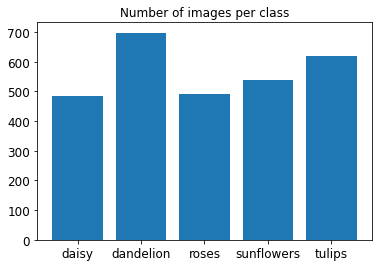

In [45]:
unique, counts = np.unique(train_gen.classes, return_counts=True)
dict1 = dict(zip(train_gen.class_indices, counts))

keys = dict1.keys()
values = dict1.values()

plt.title("Number of images per class")
plt.xticks(rotation='horizontal')
bar = plt.bar(keys, values)

Images after data augmentation

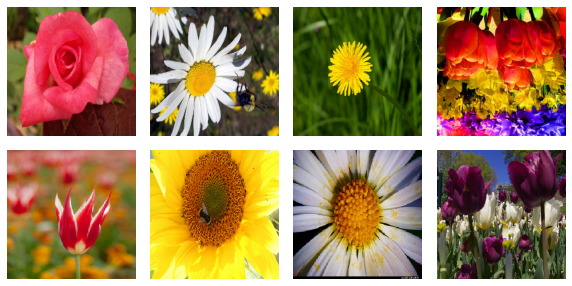

In [46]:
from mpl_toolkits.axes_grid1 import ImageGrid
x,y = next(train_gen)

fig = plt.figure(None, (10,10),frameon=False)
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(2, 4),  
                 axes_pad=0.2, 
                 share_all=True,
                 )
for i in range(2*4):
    ax = grid[i]
    ax.imshow(x[i],cmap='Greys_r')
    ax.axis('off')  

### simple CNN

In [47]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(image_size,image_size,3,))) # Input layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')) # 2D Convolution layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding = "same", activation='relu')) # 2D Convolution layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu')) # 2D Convolution layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding = "same", activation='relu')) # 2D Convolution layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu')) # 2D Convolution layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
model.add(tf.keras.layers.Flatten()) # Dense Layers after flattening the data
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2)) # Dropout
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2)) # Dropout
model.add(tf.keras.layers.Dense(5, activation='softmax')) # Add Output Layer


In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
activity = model.fit(train_gen,
          epochs=10, # Increase number of epochs if you have sufficient hardware
          steps_per_epoch= 1000//batch_size,  # Number of train images // batch_size
          validation_data=val_gen,
          validation_steps = 10//batch_size, # Number of val images // batch_size
          
          verbose = 1
)

Epoch 1/10
100/100 [==============================] - 81s 807ms/step - loss: 1.6410 - accuracy: 0.2721 - val_loss: 1.5037 - val_accuracy: 0.3000
Epoch 2/10
100/100 [==============================] - 83s 828ms/step - loss: 1.3719 - accuracy: 0.3887 - val_loss: 1.3052 - val_accuracy: 0.3000
Epoch 3/10
100/100 [==============================] - 84s 839ms/step - loss: 1.3819 - accuracy: 0.4157 - val_loss: 1.3071 - val_accuracy: 0.5000
Epoch 4/10
100/100 [==============================] - 80s 798ms/step - loss: 1.3291 - accuracy: 0.4015 - val_loss: 1.1653 - val_accuracy: 0.3000
Epoch 5/10
100/100 [==============================] - 82s 822ms/step - loss: 1.2718 - accuracy: 0.4774 - val_loss: 1.0869 - val_accuracy: 0.4000
Epoch 6/10
100/100 [==============================] - 83s 825ms/step - loss: 1.2260 - accuracy: 0.4403 - val_loss: 1.1061 - val_accuracy: 0.4000
Epoch 7/10
100/100 [==============================] - 90s 897ms/step - loss: 1.1397 - accuracy: 0.5490 - val_loss: 1.3303 - val_ac

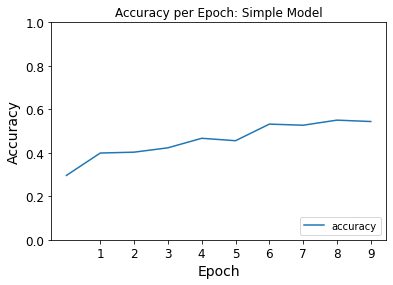

In [72]:
plt.plot(activity.history['accuracy'], label='accuracy')
plt.title("Accuracy per Epoch: Simple Model")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(list(range(1,10)))
plt.ylim([0, 1])
plt.legend(loc='lower right')

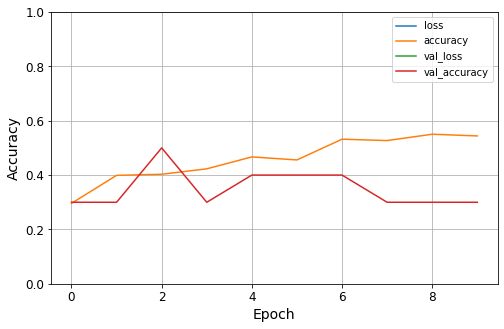

In [51]:
import pandas as pd

pd.DataFrame(activity.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [52]:
model.evaluate(test_gen)

1/1 [==============================] - 0s 265ms/step - loss: 0.9380 - accuracy: 0.6000


[0.9379583597183228, 0.6000000238418579]

### implementing resnet 50

In [53]:
model = keras.applications.resnet50.ResNet50(weights = "imagenet")

In [54]:
data_generator = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range = 0.4,
                                   height_shift_range = 0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   )

image_size = 224
batch_size = 10

In [55]:
train_gen2 = data_generator.flow_from_directory(
        TRAIN_PATH,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical')

num_classes = len(train_gen2.class_indices)

Found 3540 images belonging to 5 classes.


In [56]:
val_gen2 = data_generator.flow_from_directory(
        VALID_PATH,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical')


Found 80 images belonging to 5 classes.


In [57]:
test_gen2 = data_generator.flow_from_directory(
        TEST_PATH,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 50 images belonging to 5 classes.


In [58]:
pip install ResNet50

ERROR: Could not find a version that satisfies the requirement ResNet50 (from versions: none)
ERROR: No matching distribution found for ResNet50
Note: you may need to restart the kernel to use updated packages.


In [59]:
resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'




In [60]:

model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.layers[0].trainable = False

In [61]:

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
history2 = model.fit(train_gen2,
        steps_per_epoch=int(len(train_gen2)/batch_size) + 1,
        epochs=10, validation_data=val_gen2,
          validation_steps = 10//batch_size, # Number of val images // batch_size
          )

Epoch 1/10
36/36 [==============================] - 24s 618ms/step - loss: 1.6768 - accuracy: 0.3618 - val_loss: 0.4149 - val_accuracy: 0.7000
Epoch 2/10
36/36 [==============================] - 21s 592ms/step - loss: 0.9131 - accuracy: 0.6689 - val_loss: 0.2807 - val_accuracy: 0.9000
Epoch 3/10
36/36 [==============================] - 21s 593ms/step - loss: 0.7892 - accuracy: 0.7156 - val_loss: 0.6395 - val_accuracy: 0.8000
Epoch 4/10
36/36 [==============================] - 21s 592ms/step - loss: 0.5115 - accuracy: 0.8203 - val_loss: 0.4186 - val_accuracy: 0.9000
Epoch 5/10
36/36 [==============================] - 22s 597ms/step - loss: 0.4753 - accuracy: 0.8306 - val_loss: 0.2068 - val_accuracy: 0.9000
Epoch 6/10
36/36 [==============================] - 22s 607ms/step - loss: 0.4807 - accuracy: 0.8223 - val_loss: 0.5095 - val_accuracy: 0.8000
Epoch 7/10
36/36 [==============================] - 21s 591ms/step - loss: 0.4909 - accuracy: 0.8152 - val_loss: 0.2397 - val_accuracy: 0.8000

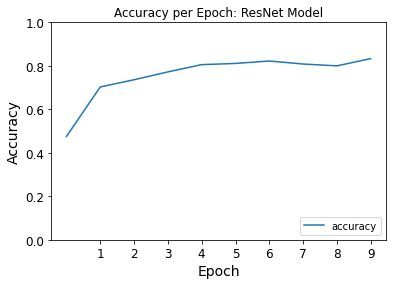

In [71]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy per Epoch: ResNet Model")
plt.xticks(list(range(1,10)))
plt.ylim([0, 1])
plt.legend(loc='lower right')

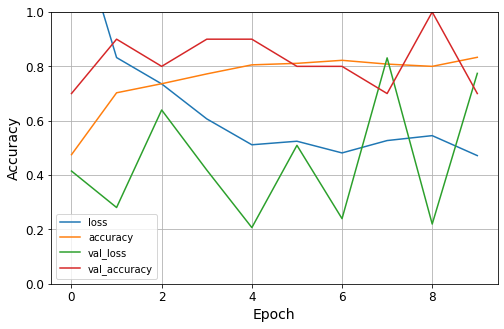

In [64]:
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [65]:
model.evaluate(test_gen2)

5/5 [==============================] - 3s 577ms/step - loss: 0.8278 - accuracy: 0.7600


[0.8278446793556213, 0.7599999904632568]